# Instrument Classification

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please 

In [2]:
# Define paths
train_dir = 'dataset/train'
test_dir = 'dataset/test'

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values to [0,1]
    validation_split=0.2,    # Use 20% of training data for validation
    rotation_range=20,       # Data augmentation
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  
    batch_size=32,
    class_mode='categorical',  # For 30 classes
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Get class labels (instrument names)
class_labels = list(train_generator.class_indices.keys())

Found 3847 images belonging to 30 classes.
Found 946 images belonging to 30 classes.
Found 150 images belonging to 30 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),  # Reduced from 224
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),  # Reduced from 224 because i dont have an RTX 5090
    Dropout(0.5),
    Dense(30, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,172,830 (42.62 MB)

 Trainable params: 11,172,830 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20, # Will get a low accuracy, but can not be waiting a day just for the training to be done
    validation_data=validation_generator
)

C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.0603 - loss: 3.4162 - val_accuracy: 0.1163 - val_loss: 3.2926
Epoch 2/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 68s 560ms/step - accuracy: 0.0868 - loss: 3.3019 - val_accuracy: 0.1163 - val_loss: 3.1906
Epoch 3/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 69s 569ms/step - accuracy: 0.0951 - loss: 3.2095 - val_accuracy: 0.1533 - val_loss: 3.0629
Epoch 4/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 69s 571ms/step - accuracy: 0.1230 - loss: 3.1102 - val_accuracy: 0.1712 - val_loss: 2.8901
Epoch 5/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 68s 564ms/step - accuracy: 0.1489 - loss: 3.0501 - val_accuracy: 0.1871 - val_loss: 2.8393
Epoch 6/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 70s 579ms/step - accuracy: 0.1500 - loss: 2.9869 - val_accuracy: 0.1966 - val_loss: 2.8763
Epoch 7/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 69s 570ms/step - accuracy: 0.1762 - loss: 2.8917 - val_accuracy: 0.2421 - val_loss: 2.6759
Epoch 8/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 69s 566ms/step - accuracy: 0.1851 - loss: 2.8

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_image(image_path, target_size=(224, 224)):
    """Load and preprocess image for model prediction."""
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img, img_array

def predict_instrument(image_path, model, class_labels):
    """
    Predict the instrument class of a given image using the model.
    
    Parameters:
        image_path (str): Path to the image.
        model (tf.keras.Model): Trained Keras model.
        class_labels (list): List of class labels corresponding to model output.
    
    Displays:
        - The image with predicted class label.
        - The predicted class label in the terminal.
    """
    # Preprocess image
    img, processed_image = preprocess_image(image_path)

    # Predict
    prediction = model.predict(processed_image)
    predicted_class = class_labels[np.argmax(prediction)]

    # Show result
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Predicted instrument: {predicted_class}")
    plt.axis('off')
    plt.show()

    print(f"Predicted instrument: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


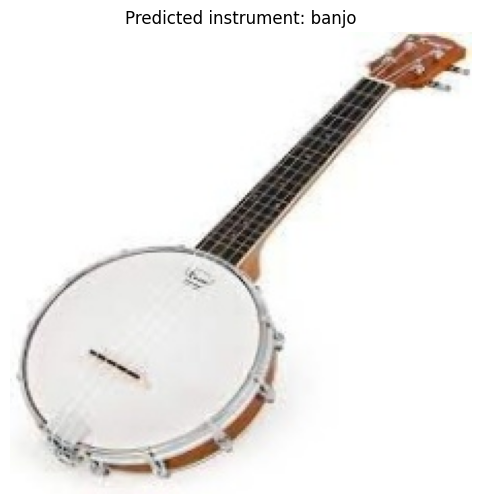

Predicted instrument: banjo


In [11]:
predict_instrument('dataset/test_sample/1.jpg', model, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


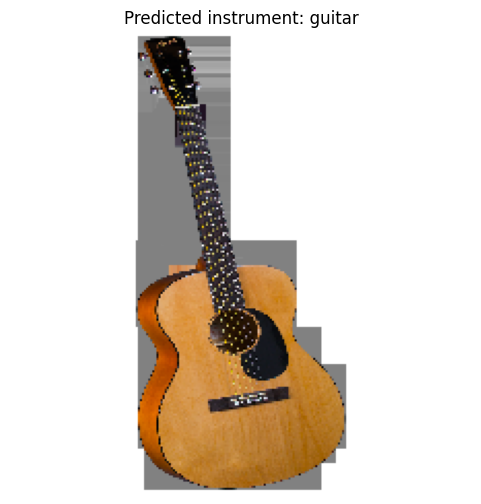

Predicted instrument: guitar


In [12]:
predict_instrument('dataset/test_sample/test.png', model, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


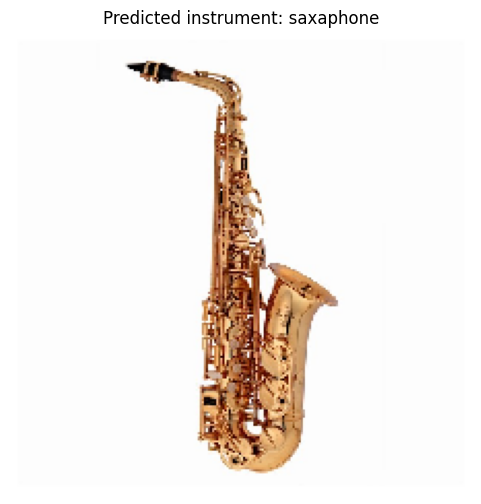

Predicted instrument: saxaphone


In [14]:
predict_instrument('dataset/test_sample/stuff.jpg', model, class_labels)